## Relation of Cases and Legal acts

In [1]:
import pandas as pd

In [2]:
cases_laws = pd.read_csv('../datasets/cjeu_cited_laws.csv')

#### Labeling Regulations, Directives and Decisions
cases_laws['law_type'] = ['R' if ('R' in i) else 'L' if ('L' in i) else 'D' if ('D' in i) else 'NA' for i in cases_laws.law_id]
filtr = [l for l in cases_laws.law_id if len(l) <= 12]
cases_laws = cases_laws[cases_laws.law_id.isin(filtr)] 

In [3]:
cases_laws.head(3)

,case_id,law_id,cited_article,law_type
1,61954CJ0001,11951K002,ENTIRE_ARTICLE,NA
2,61954CJ0001,11951K003,ENTIRE_ARTICLE,NA
3,61954CJ0001,11951K004,ENTIRE_ARTICLE,NA


In [4]:
cases_laws.law_type.unique()

array(['NA', 'D', 'R', 'L'], dtype=object)

### 1. What are the cases that cite the most (unique) laws?

A case can cite a law multiples times since can make different references depending on the article is citing

In [5]:
#cases_laws[cases_laws['case_id']=='62010CJ0311']
#Top case: https://eur-lex.europa.eu/legal-content/EN/ALL/?uri=CELEX:62010CJ0311&qid=1594558909597
#It is actually a failure in transposition!!
#Counting non-unique laws

In [6]:
# Cases that cite the most laws
cases_count = cases_laws\
    .drop_duplicates(subset='law_id', keep="last")\
    .groupby('case_id')\
    .count()['law_id']\
    .sort_values(ascending=False)\
    .reset_index()\
    .rename(columns={'law_id':'laws'})
cases_count.head(10)

,case_id,laws
0,62014CJ0005,40
1,62001CJ0030,26
2,62015CJ0589,22
3,61997CJ0253,22
4,62015CJ0079,18
5,61978CJ0154,16
6,61997CJ0046,16
7,62015CJ0333,15
8,62012CJ0335,15
9,62017CJ0611,14


Top case: https://eur-lex.europa.eu/legal-content/EN/TXT/?qid=1596578406034&uri=CELEX:62014CJ0005  
It is an interlocutory procedure for review of constitutionality

### 2. What are the laws that reference most cases?

We only account mandatory EU legal acts: Regulations, Directives and Decisions 

In [9]:
# Laws that are most cited by cases
laws_count = cases_laws[(cases_laws['law_type'] == 'R') | (cases_laws['law_type'] == 'L') | (cases_laws['law_type'] == 'D')]\
    .drop_duplicates(subset='case_id', keep="last")\
    .groupby(['law_id','law_type'])\
    .count()['case_id']\
    .sort_values(ascending=False)\
    .reset_index()\
    .rename(columns={'case_id':'cases'})

In [10]:
laws_count.head(10)

,law_id,law_type,cases
0,31977L0388,L,338
1,32006L0112,L,246
2,31971R1408,R,234
3,32009R0207,R,223
4,31994R0040,R,161
5,32003R0001,R,94
6,31968R1612,R,86
7,32001R0044,R,84
8,31968R0950,R,82
9,32004L0018,L,73


Top law: https://eur-lex.europa.eu/legal-content/EN/TXT/?qid=1596582952106&uri=CELEX:31977L0388

        Sixth Council Directive 77/388/EEC of 17 May 1977 on the harmonization of the laws of the Member States relating to turnover taxes - Common system of value added tax: uniform basis of assessment. No longer in force, Date of end of validity: 31/12/2006; Repealed by 32006L0112 .

### 3. How many case law refrences a legal acts need to be in the top 1%?

In [21]:
# What is the "number of citations"-value on which the top 10% citations will be above
value = laws_count.cases.quantile(0.99)
value

32.220000000000255

In [22]:
laws_count['top_cited'] = laws_count.cases.apply(lambda x: (1 if x > value else 0))
laws_count.top_cited.sum()

32

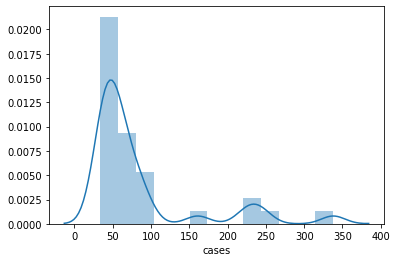

In [23]:
# Legal Citations distribution
import seaborn as sns
sns.distplot(laws_count[laws_count.top_cited == 1 ].cases)

In [29]:
cases_laws[cases_laws.law_id.isin(list(laws_count[laws_count.top_cited == 1].law_id))].drop_duplicates(subset='case_id', keep="last")\
    .to_csv('../datasets/top_refrenced_laws.csv')